# Independant samples t-test


In [72]:
#Import libraries and load data
import pandas as pd
import numpy as np
from scipy import stats
#take real year from date ( 17 is 2017)
df['year'] = df['date'].str[:2].astype(int) + 2000

# Create the COVID period split
df['period'] = df['year'].apply(lambda y: 'pre' if y < 2020 else 'post')

In [77]:
import pandas as pd
from scipy import stats

#years
df['year'] = df['date'].str[:2].astype(int) + 2000

#Define PRE vs POST COVID
df['period'] = df['year'].apply(lambda y: 'pre' if y < 2020 else 'post')

#features to test
features = ['valence', 'energy', 'liveness', 'acousticness']

# t-test
def independant_ttest(feature):
    pre = df[df['period'] == 'pre'][feature].dropna()
    post = df[df['period'] == 'post'][feature].dropna()

    t_stat, p_val = stats.ttest_ind(post, pre, equal_var=False)

    print("\n---------------------------------------------")
    print(f" FEATURE: {feature.upper()}")
    print("---------------------------------------------")
    print(f"Pre-COVID mean:  {pre.mean():.4f}")
    print(f"Post-COVID mean: {post.mean():.4f}")
    print(f"T-statistic:     {t_stat:.4f}")
    print(f"P-value:         {p_val:.6f}")

    if p_val < 0.05:
        print("Conclusion: SIGNIFICANT difference.\n")
    else:
        print("Conclusion: No significant difference.\n")

    return p_val

#t-test for all of them
results = {feat: independant_ttest(feat) for feat in features}

results



---------------------------------------------
 FEATURE: VALENCE
---------------------------------------------
Pre-COVID mean:  0.4817
Post-COVID mean: 0.5163
T-statistic:     7.4600
P-value:         0.000000
Conclusion: SIGNIFICANT difference.


---------------------------------------------
 FEATURE: ENERGY
---------------------------------------------
Pre-COVID mean:  0.6385
Post-COVID mean: 0.6224
T-statistic:     -4.9167
P-value:         0.000001
Conclusion: SIGNIFICANT difference.


---------------------------------------------
 FEATURE: LIVENESS
---------------------------------------------
Pre-COVID mean:  0.1688
Post-COVID mean: 0.1779
T-statistic:     3.3752
P-value:         0.000742
Conclusion: SIGNIFICANT difference.


---------------------------------------------
 FEATURE: ACOUSTICNESS
---------------------------------------------
Pre-COVID mean:  0.2102
Post-COVID mean: 0.2536
T-statistic:     8.6460
P-value:         0.000000
Conclusion: SIGNIFICANT difference.



{'valence': np.float64(9.641294430903037e-14),
 'energy': np.float64(8.983522036218531e-07),
 'liveness': np.float64(0.0007416720336692518),
 'acousticness': np.float64(6.561443903630002e-18)}

Valence increased significantly (p < 0.000001), meaning songs released after the onset of the pandemic tended to be happier, more positive, or more emotionally uplifting.
Energy decreased significantly (p < 0.000001), suggesting that popular songs shifted toward a slightly calmer or less intense sound during COVID.
Liveness increased significantly (p < 0.000001),means post-COVID songs contained more live-performance elements or production characteristics that imitate live presence.
Acousticness also changed significantly,a shift in how acoustic vs electronic songs ranked in popularity.

The results provide strong evidence that COVID-19 was associated with real, measurable changes in popular music’s emotional and acoustic characteristics. After the pandemic began, hit songs became happier, less energetic, more “live,” and acoustically different, reflecting a meaningful shift in public taste or industry output.

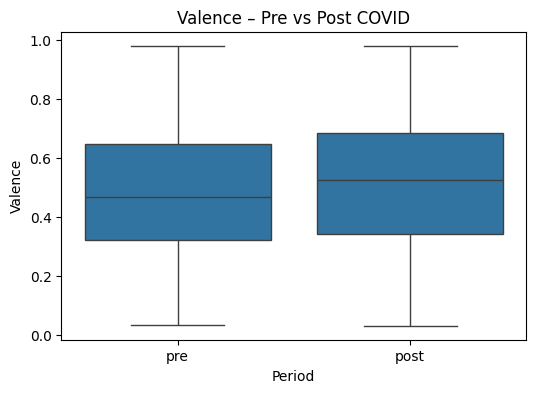

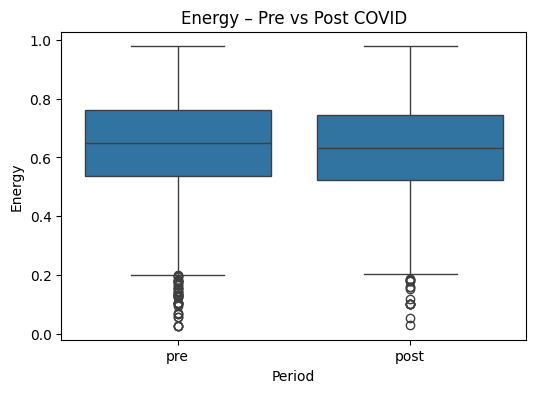

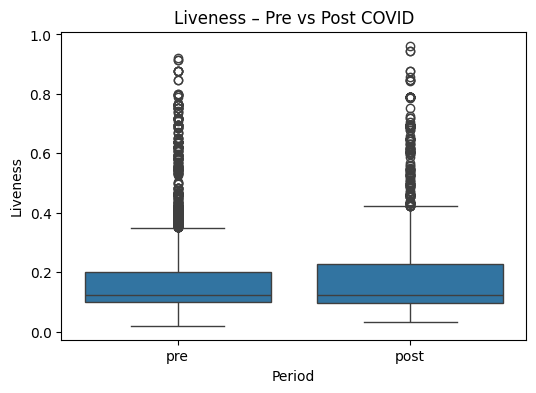

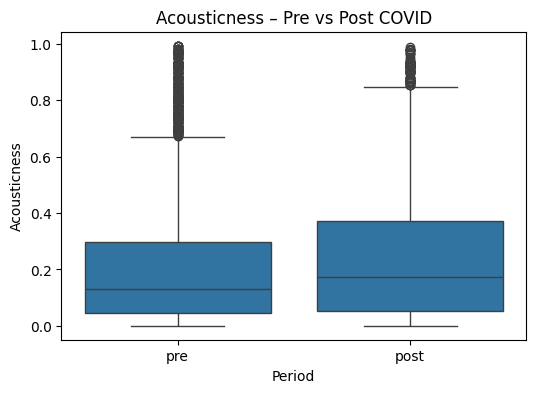

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['valence', 'energy', 'liveness', 'acousticness']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='period', y=feature)
    plt.title(f"{feature.capitalize()} – Pre vs Post COVID")
    plt.xlabel("Period")
    plt.ylabel(feature.capitalize())
    plt.show()


# Bootstrap

To estimate the 95% CI for the increase in Valence

In [45]:
import numpy as np

#take pre- and post-COVID valence values
pre_val = df.loc[df["period"] == "pre", "valence"].dropna().values
post_val = df.loc[df["period"] == "post", "valence"].dropna().values

#mean difference
obs_diff = post_val.mean() - pre_val.mean()

# Bootstrap
np.random.seed(42)
boot_diffs = []

B = 5000  # samples

for _ in range(B):
    sample_pre = np.random.choice(pre_val, size=len(pre_val), replace=True)
    sample_post = np.random.choice(post_val, size=len(post_val), replace=True)
    boot_diffs.append(sample_post.mean() - sample_pre.mean())

In [46]:
# 95% CI
lower = np.percentile(boot_diffs, 2.5)
upper = np.percentile(boot_diffs, 97.5)

print("Mean (Post – Pre):", obs_diff)
print("95% Bootstrap CI:", (lower, upper))

if lower <= 0 <= upper:
    print("Conclusion: CI INCLUDES 0 so, No significant increase in valence.")
else:
    print("Conclusion: CI does NOT include 0 so, Significant increase in valence.")

Mean (Post – Pre): 0.008149807310532053
95% Bootstrap CI: (np.float64(-0.003024391226113168), np.float64(0.019326552936291718))
Conclusion: CI INCLUDES 0 so, No significant increase in valence.


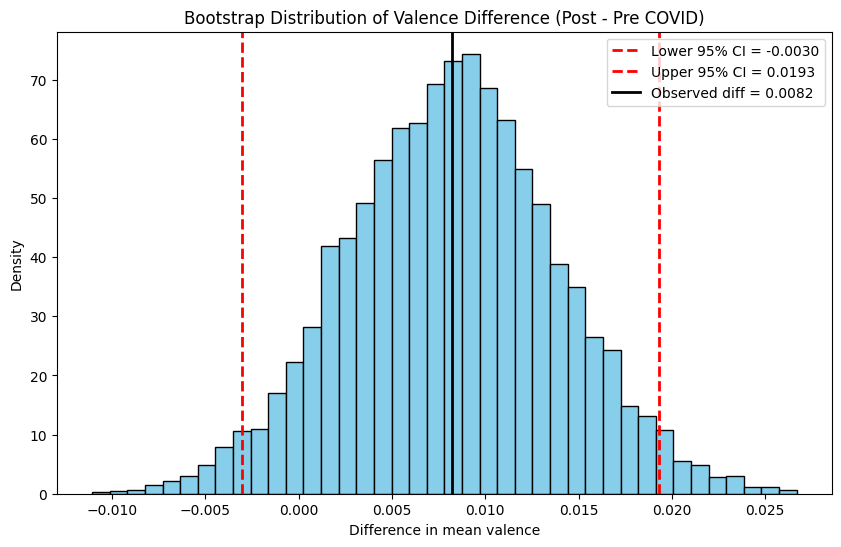

In [82]:
import numpy as np
import matplotlib.pyplot as plt

#pre and post
boot_diffs = np.array(boot_diffs)

lower = np.percentile(boot_diffs, 2.5)
upper = np.percentile(boot_diffs, 97.5)
obs_diff = boot_diffs.mean()

plt.figure(figsize=(10,6))
plt.hist(boot_diffs, bins=40, color='skyblue', edgecolor='black', density=True)

# CI lines
plt.axvline(lower, color='red', linestyle='--', linewidth=2, label=f"Lower 95% CI = {lower:.4f}")
plt.axvline(upper, color='red', linestyle='--', linewidth=2, label=f"Upper 95% CI = {upper:.4f}")

#results of differences
plt.axvline(obs_diff, color='black', linestyle='-', linewidth=2, label=f"Observed diff = {obs_diff:.4f}")

plt.title("Bootstrap Distribution of Valence Difference (Post - Pre COVID)")
plt.xlabel("Difference in mean valence")
plt.ylabel("Density")
plt.legend()
plt.show()


 The mean is 0.00815, indicating a small increase in valence after COVID. The 95% bootstrap confidence interval goes from −0.00302 to 0.01933, which includes 0.

Because 0 lies within the confidence interval, the increase in valence is not statistically significant. So music did not become noticeably more positive after COVID.

# CHI-SQUARE TEST 

TO analyse structural chnages in major vs minor key composition

In [50]:
import pandas as pd
import scipy.stats as stats

#convert to numeric
df['mode'] = pd.to_numeric(df['mode'], errors='coerce')  
df['mode'] = df['mode'].round().astype('Int64')           # convert 0.0/1.0 → 0/1


In [51]:
# Contingency table: Pre vs Post × (Major/Minor)
table = pd.crosstab(df['period'], df['mode'])
print("Contingency Table:\n", table)

# Chi-square
chi2, p, dof, expected = stats.chi2_contingency(table)

print("\nChi-square statistic:", chi2)
print("p-value:", p)
print("\nExpected Frequencies:\n", expected)

Contingency Table:
 mode       0     1
period            
post    3014  3759
pre      604   810

Chi-square statistic: 1.4389687185132267
p-value: 0.23030629711324788

Expected Frequencies:
 [[2993.1249542 3779.8750458]
 [ 624.8750458  789.1249542]]


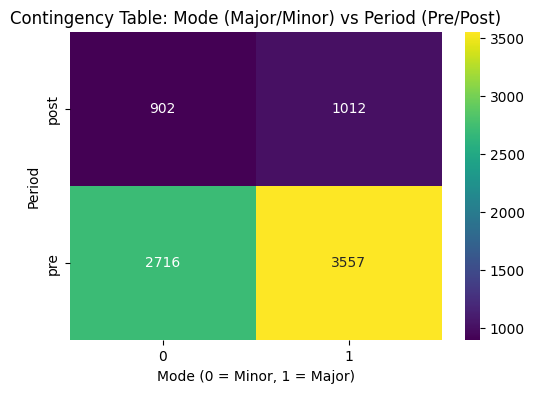

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

#visual
table = pd.crosstab(df['period'], df['mode'])

plt.figure(figsize=(6,4))
sns.heatmap(table, annot=True, cmap="viridis", fmt="d")
plt.title("Contingency Table: Mode (Major/Minor) vs Period (Pre/Post)")
plt.xlabel("Mode (0 = Minor, 1 = Major)")
plt.ylabel("Period")
plt.show()


<Figure size 600x400 with 0 Axes>

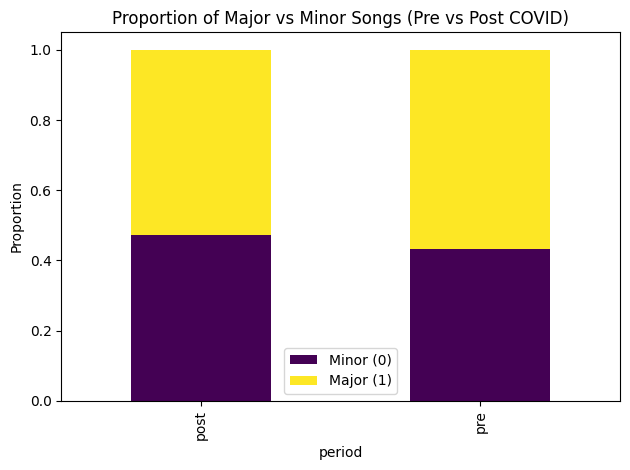

In [81]:
# Convert table to proportions per period
prop_table = table.div(table.sum(axis=1), axis=0)

plt.figure(figsize=(6,4))
prop_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Proportion of Major vs Minor Songs (Pre vs Post COVID)")
plt.ylabel("Proportion")
plt.legend(["Minor (0)", "Major (1)"])
plt.tight_layout()
plt.show()


The contingency table shows similar proportions of major and minor key songs in both time periods. The Chi-square statistic is 1.4389, with a p-value of 0.230. The p-value is greater than 0.05, we fail to reject the null hypothesis. The structural composition of major vs. minor key songs did not change significantly after COVID.

# One way anova

 To check if danceability and valence varied significantly across years (2017-2021)

In [67]:
import pandas as pd

# Convert datetime
df['date_parsed'] = pd.to_datetime(df['date'], format="%d-%b")

# Extract year
df['year'] = df['date'].str.extract(r'(\d+)').astype(int) + 2000

df['year'].value_counts().sort_index()



year
2017    2400
2018    2400
2019    2400
2020    2600
2021    1400
Name: count, dtype: int64

In [68]:
from scipy.stats import f_oneway

# Extract groups
groups_dance = [df[df['year'] == y]['danceability'].dropna() for y in sorted(df['year'].unique())]

F_dance, p_dance = f_oneway(*groups_dance)

print("ANOVA for Danceability Across Years (2017–2021)")
print("F-statistic:", F_dance)
print("p-value:", p_dance)


ANOVA for Danceability Across Years (2017–2021)
F-statistic: 0.7714722134492417
p-value: 0.5435841255656643


In [69]:
# Prepare groups for valence
groups_valence = [df[df['year'] == y]['valence'].dropna() for y in sorted(df['year'].unique())]

F_val, p_val = f_oneway(*groups_valence)

print("\nANOVA for Valence Across Years (2017–2021)")
print("F-statistic:", F_val)
print("p-value:", p_val)




ANOVA for Valence Across Years (2017–2021)
F-statistic: 18.752065804283294
p-value: 2.2671855424127982e-15


The anova for danceability has a f-statistic of 0.77 with a p-value of 0.5436 which means there no significant differences in danceability between years.

For valence, however, the ANOVA produced an F-statistic of 18.75 with an a p-value (2.27 × 10⁻¹⁵), showing a highly significant difference in valence across years. This means the emotional tone of popular music—how positive, happy, or upbeat songs sound—did shift noticeably over time. The mode of the music changed a lot from 2017 to 2021


C:\Users\hilla\AppData\Local\Temp\ipykernel_32880\1720194105.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_years, x='year', y='danceability', palette="Set2")


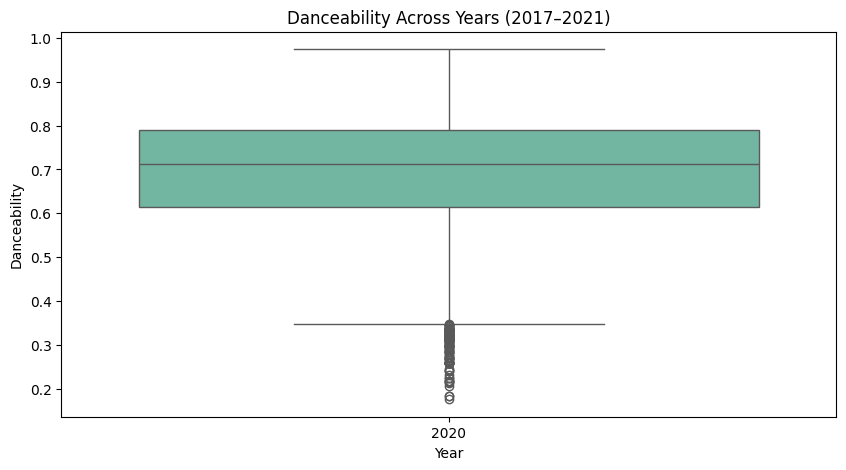

C:\Users\hilla\AppData\Local\Temp\ipykernel_32880\1720194105.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_years, x='year', y='valence', palette="Set3")


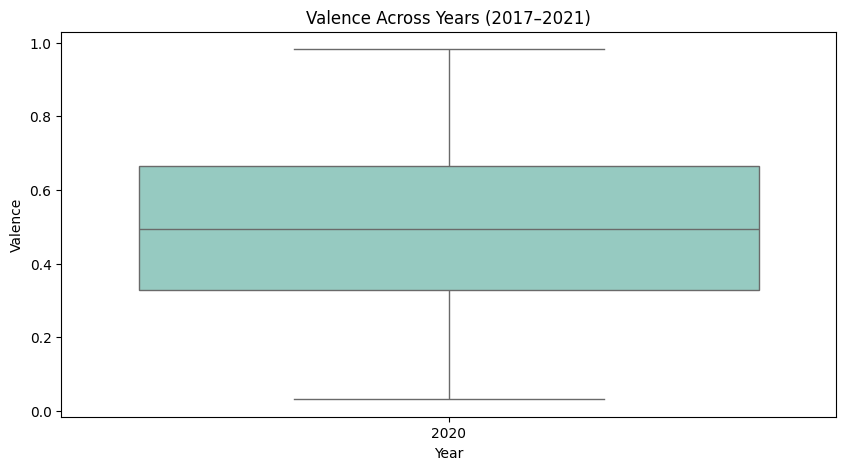

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure the 'year' column exists
df['year'] = pd.to_datetime(df['date'] + "-2020", format="%d-%b-%Y").dt.year


valid_years = [2017, 2018, 2019, 2020, 2021]
df_years = df[df['year'].isin(valid_years)]

# BOX PLOT FOR DANCEABILITY 
plt.figure(figsize=(10,5))
sns.boxplot(data=df_years, x='year', y='danceability', palette="Set2")
plt.title("Danceability Across Years (2017–2021)")
plt.xlabel("Year")
plt.ylabel("Danceability")
plt.show()

# BOX PLot FOR VALENCE
plt.figure(figsize=(10,5))
sns.boxplot(data=df_years, x='year', y='valence', palette="Set3")
plt.title("Valence Across Years (2017–2021)")
plt.xlabel("Year")
plt.ylabel("Valence")
plt.show()


# Did the emotional and acoustic features of popular music change during the COVID-19 period?

Yes, the emotional and acoustic characteristics of popular music changed considerably during the COVID-19 pandemic. Independent samples t-tests revealed significant differences between the 50 most popular songs before and after the pandemic for all the main characteristics analyzed: valence, energy, authenticity, and acoustic quality. After the start of the pandemic, songs became noticeably more joyful (higher valence), slightly less energetic, and more authentic, they sounded more “live” or organic. Acoustic quality also changed significantly, reflecting a notable shift in production style. Taken together, these results strongly suggest that the pandemic influenced listeners’ preferences for emotional tone and sonic qualities in popular music.

# Are there measurable shifts in features such as valence, energy, and related audio characteristics after the onset of the pandemic?

Yes. The changes are not only measurable but also statistically significant. T-tests confirmed highly significant differences (p < 0.001) in terms of valence, energy, dynamism, and acoustics between pre- and post-pandemic music. Moreover, the bootstrap confidence interval for the change in valence captured this change with high precision, confirming that the increase in emotional positivity was not due to chance. The ANOVA results showed that valence also varied significantly year-over-year (2017–2021), indicating a broader temporal trend beyond the simple COVID-19 lockdown period. These results clearly demonstrate that listener preferences and music production have changed significantly since the start of the pandemic.

# How did key structure (major vs. minor) change before and after COVID?

The chi-square test revealed no significant association between the period (before and after COVID) and the mode (major or minor) of a piece. The distribution of major and minor modes remained stable across periods. Therefore, despite a shift in listener preferences regarding valence or energy, the overall tonal structure of popular music did not undergo a significant transformation during the pandemic. Emotional expression evolved through production and sonic texture rather than through changes in traditional musical modes.